Description
- geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
- count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
- age (type: int): age of the building in years.
- area_percentage (type: int): normalized area of the building footprint.
- height_percentage (type: int): normalized height of the building footprint.
- land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
- foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
- roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.
- ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
- other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
position (type: categorical): position of the building. Possible values: j, o, s, t.
- plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
- has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
- has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
- has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
- has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
- has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
- has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
- has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
- has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
- has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
- has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
- has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
- legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
- count_families (type: int): number of families that live in the building.
- has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
- has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
- has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
- has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
- has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
- has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
- has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
- has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
- has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
- has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
- has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.



## Problem description
We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

- **1 represents low damage, 2 represents a medium amount of damage, 3 represents almost complete destruction**

## Performance metric
To measure the performance of our algorithms, we'll use the F1 score which balances the precision and recall of a classifier. Traditionally, the F1 score is used to evaluate performance on a binary classifier, but since we have three possible labels we will use a variant called the micro averaged F1 score.

Fmicro=2⋅Pmicro⋅RmicroPmicro+Rmicro
where

Pmicro=∑3k=1TPk∑3k=1(TPk+FPk),  Rmicro=∑3k=1TPk∑3k=1(TPk+FNk)
and TP is True Positive, FP is False Positive, FN is False Negative, and k represents each class in 1,2,3.

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [520]:
y_df=pd.read_csv('/content/drive/MyDrive/Portfolio-Projects/Portfolio Projects/Earthquake Prediction Drivendata/train_labels.csv')

In [521]:
y_df

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [522]:
df=pd.read_csv('/content/drive/MyDrive/Portfolio-Projects/Portfolio Projects/Earthquake Prediction Drivendata/train_values.csv')
df.sample(7)  #How does the data look like

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
222880,295422,20,1021,5023,2,0,23,5,n,h,...,0,0,0,0,0,0,0,0,0,0
4242,210873,21,107,8884,2,40,7,5,t,r,...,0,0,0,0,0,0,0,0,0,0
178361,497029,13,531,7975,2,0,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
215656,866651,26,435,10275,1,35,3,3,t,w,...,0,0,0,0,0,0,0,0,0,0
226383,668309,4,529,5383,2,60,7,4,n,r,...,0,0,0,0,0,0,0,0,0,0
116338,619680,26,991,3006,2,15,3,5,t,w,...,0,0,0,0,0,0,0,0,0,0
257870,3494,11,883,11952,3,60,9,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [523]:
df.shape #How big is the data

(260601, 39)

In [524]:
df.info()  #what is the data type of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [525]:
df.isna().sum() # any missing values?

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

### We have a cleaned dataset

In [526]:
df1=df.merge(y_df,how='inner',on='building_id')  #Merging data with given target column df (y_df)

In [527]:
df1.sample(7)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
9537,898003,6,1041,2859,2,30,3,5,t,r,...,0,0,0,0,0,0,0,0,0,2
77741,234173,3,1387,8023,5,80,3,10,t,r,...,0,0,0,0,0,0,0,0,0,2
113933,32648,17,1183,1426,2,30,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
356,172998,17,596,11657,3,5,8,6,t,r,...,0,0,0,0,0,0,0,0,0,2
212166,99972,30,73,7580,2,20,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
16513,40765,17,399,12227,3,15,6,6,t,r,...,0,0,0,0,0,0,0,0,0,3
248439,563447,6,398,7047,2,5,5,6,o,r,...,0,0,0,0,0,0,0,0,0,2


In [528]:
df1.shape

(260601, 40)

In [529]:
df2=df1.copy()

In [530]:
df1.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [531]:
df1.iloc[:,-12:-1]   #Looks like the data has been one hot encoded

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
260596,0,0,0,0,0,0,0,0,0,0,0
260597,0,0,0,0,0,0,0,0,0,0,0
260598,0,0,0,0,0,0,0,0,0,0,0
260599,0,0,0,0,0,0,0,0,0,0,0


In [532]:
df1.iloc[:,-25:-16] #Looks like this is also a one hot encoded data

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered
0,1,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,1,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
260596,0,1,0,0,0,0,0,0,0
260597,0,1,0,0,0,0,0,0,0
260598,0,1,0,0,0,0,0,0,0
260599,0,0,0,0,0,1,0,0,0


In [533]:
ohe_df1 = df1.iloc[:,-12:] 
ohe_df2 = df1.iloc[:,-25:-16]

In [534]:
ohe_df = ohe_df1.join(ohe_df2) #Joining the one hot encoded data

In [535]:
ohe_df.head()

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,...,damage_grade,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered
0,0,0,0,0,0,0,0,0,0,0,...,3,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,3,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,0,1,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,3,1,0,0,0,0,0,0,0,0


In [536]:
ohe_df.shape

(260601, 21)

In [537]:
ohe_cor = ohe_df.corr()

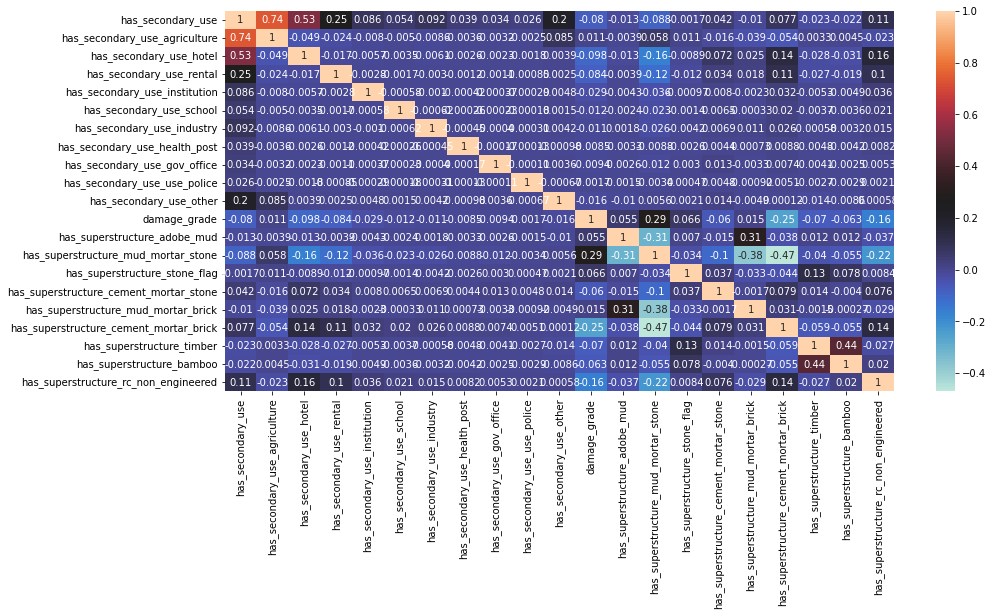

In [538]:
plt.figure(figsize = (15,7))
sns.heatmap(ohe_cor,annot=True,cmap='icefire')
plt.show()

In [539]:
ohe_df.columns

Index(['has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered'],
      dtype='object')

- One hot encoded data can have correlated columns due to encodings
- As observed, has_secondary_use column is correlated with 2 columns hence, we will be removing that column to decrease collinearity.
- has_superstructure_bamboo is also highly correlated with has_superstructure_timber column. Since has_superstructure_timber has higher negative correlation with Target variable than has_superstructure_bamboo. Hence removing has_superstructure_bamboo.
- has_superstructure_mud_mortar_stone has high correlation with has_superstructure_cement_mortar_brick. Since has_superstructure_mud_mortar_stone is more correlated with Target variable, we will remove has_superstructure_cement_mortar_brick.
- Removing these columns from our df1.

In [540]:
df1.drop(columns=['has_secondary_use','has_superstructure_bamboo','has_superstructure_cement_mortar_brick'],inplace=True)

In [541]:
df1.shape

(260601, 37)

In [542]:
df1.duplicated().sum()  # No duplicate values in the data

0

In [543]:
num_var=df1.select_dtypes(include=np.number) #Numerical variables

In [544]:
num_var.head(7)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,0,3
5,333020,8,558,6089,2,10,9,5,0,1,...,0,0,0,0,0,0,0,0,0,2
6,728451,9,475,12066,2,25,3,4,0,1,...,0,0,0,0,0,0,0,0,0,3


In [545]:
cat_var=df.select_dtypes(include=object) # Categorical Variables

In [546]:
cat_var.head(7)

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,t,d,v
1,o,r,n,x,q,s,d,v
2,t,r,n,f,x,t,d,v
3,t,r,n,f,x,s,d,v
4,t,r,n,f,x,s,d,v
5,t,r,n,f,q,s,d,v
6,n,r,n,x,q,s,d,v


### Checking Correlation

In [547]:
cor=num_var.corr()

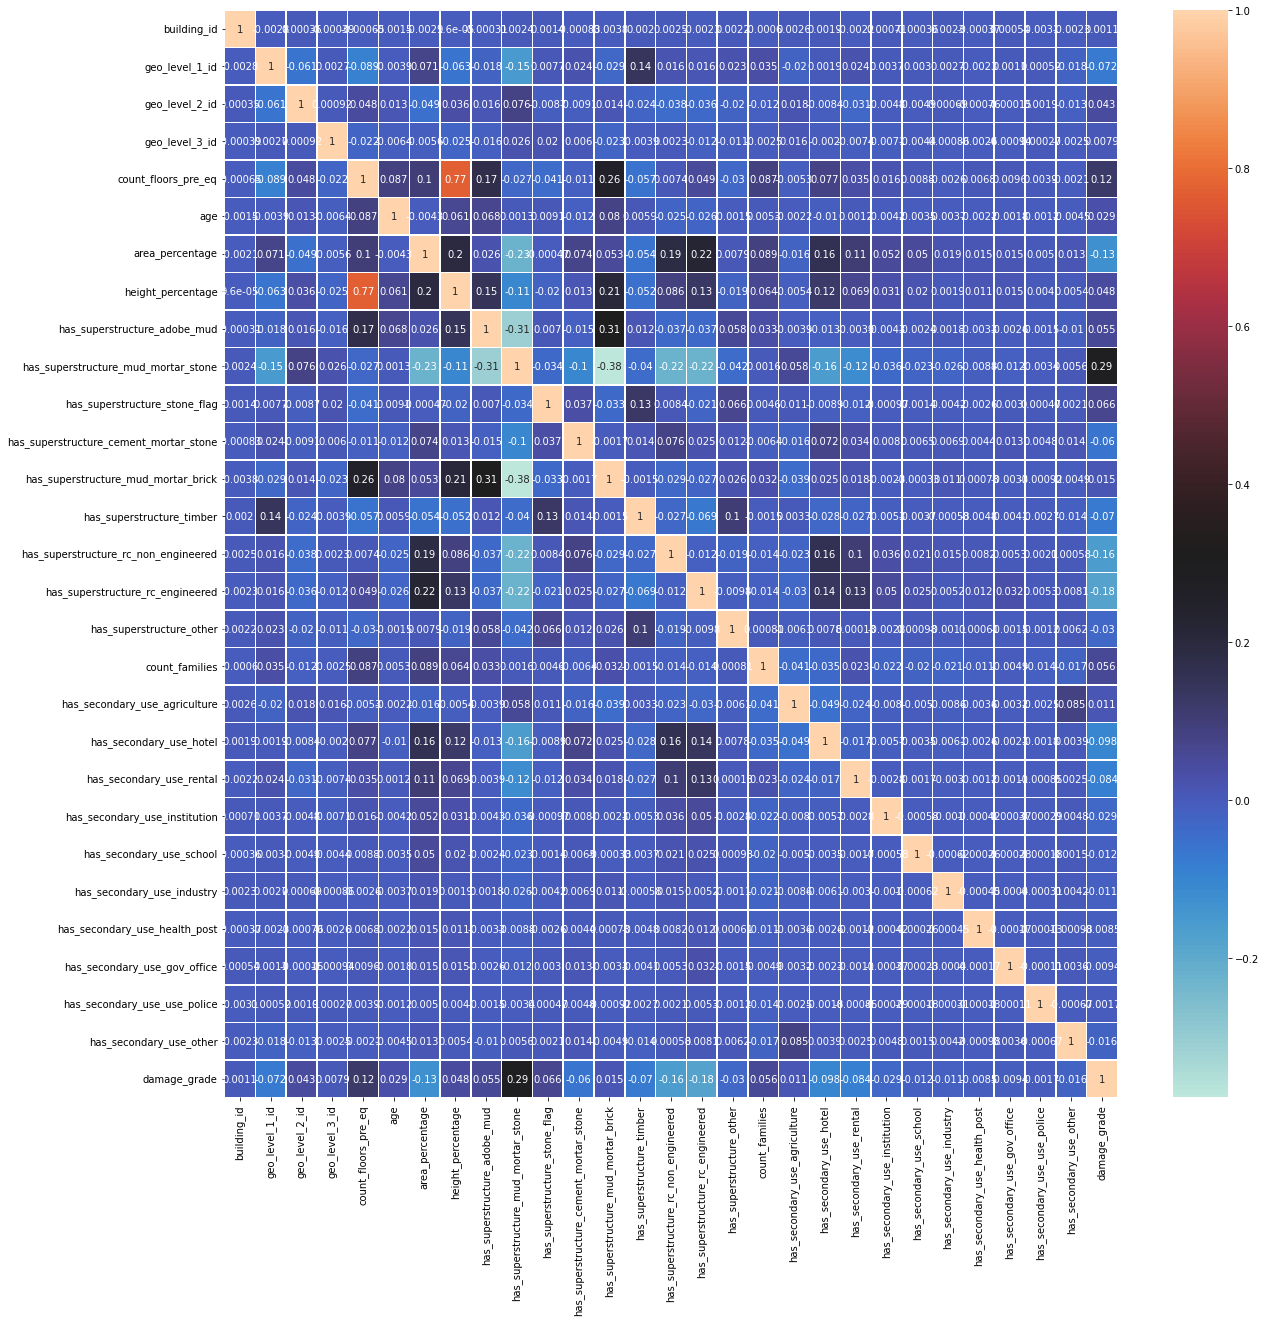

In [548]:
plt.figure(figsize=(20, 20))
sns.heatmap(cor,cmap='icefire',linewidths=.5,annot=True)



- Highly correlated columns are count_floors_pre_eq & height_percentage : 0.77


In [549]:
df1.describe() # How does the data look mathematically

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Checking Data Distributions 
- Visualizing the data

In [550]:
num_var.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


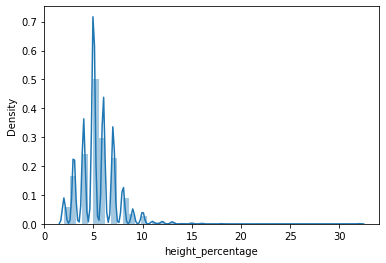

In [551]:
sns.distplot(df1['height_percentage'])

In [552]:
df1['height_percentage'].skew()

1.8082617571733322

In [553]:
df1['height_percentage'].min()

2

In [554]:
df1['count_floors_pre_eq'].unique()

array([2, 3, 1, 4, 5, 6, 7, 8, 9])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


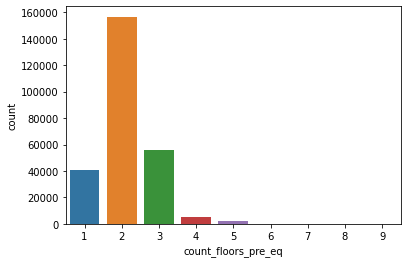

In [555]:
sns.countplot(df1['count_floors_pre_eq'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


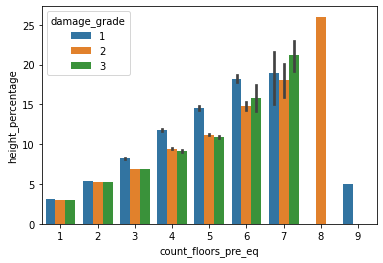

In [556]:
sns.barplot(df1['count_floors_pre_eq'],y=df1['height_percentage'],hue=df1['damage_grade'])

- count_floors_pre_eq has higher correlation with Target y, hence we will remove height_percentage column for modelling.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


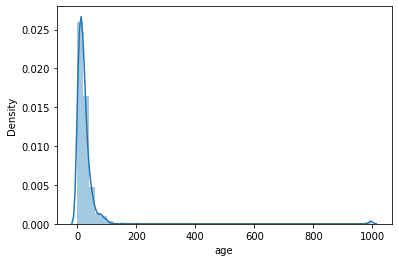

In [557]:
sns.distplot(df1['age'])

In [558]:
df1['age'].skew()  #Right skewed data

12.192494218852833

In [559]:
df1['age'].min() # Cannot use log transform for this data as there are 0 values in the data

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


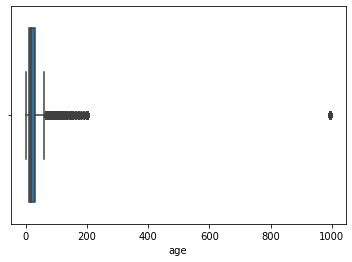

In [560]:
sns.boxplot(df1['age'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


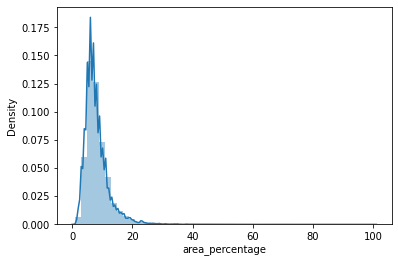

In [561]:
sns.distplot(df1['area_percentage'])

In [562]:
df1['area_percentage'].skew() #Data is right skewed

3.5260823142261435

In [563]:
df1['area_percentage'].min() # We can use log transform

1

In [564]:
ap = np.log(df1['area_percentage'])
ap

0         1.791759
1         2.079442
2         1.609438
3         1.791759
4         2.079442
            ...   
260596    1.791759
260597    1.791759
260598    1.791759
260599    2.639057
260600    1.945910
Name: area_percentage, Length: 260601, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


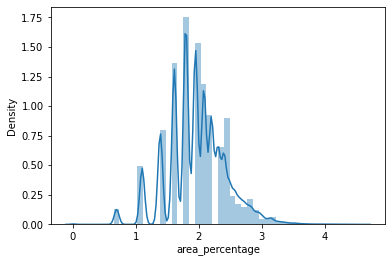

In [565]:
sns.distplot(ap)

In [566]:
ap.skew() #Skewness got decreased.

0.16443266858053723

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


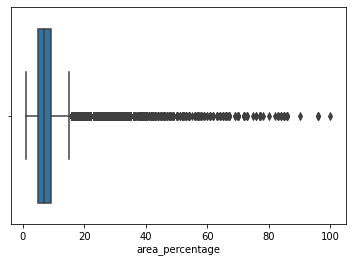

In [567]:
sns.boxplot(df1['area_percentage'])

In [568]:
df1['geo_level_1_id'].unique()

array([ 6,  8, 21, 22, 11,  9, 20,  0, 26, 17, 12, 18,  4, 27, 25, 10,  7,
        3, 13, 30, 16,  5, 15, 14, 19,  1, 24, 28, 23,  2, 29])

In [569]:
df1['geo_level_2_id'].unique()

array([487, 900, 363, ...,  77, 115, 627])

In [570]:
df1['geo_level_3_id'].unique()

array([12198,  2812,  8973, ...,  3152,  5276,  3085])

In [571]:
print(df1['geo_level_1_id'].min())
print(df1['geo_level_1_id'].max())

0
30


In [572]:
print(df1['geo_level_2_id'].min())
print(df1['geo_level_2_id'].max())

0
1427


In [573]:
print(df1['geo_level_3_id'].min())
print(df1['geo_level_3_id'].max())

0
12567


In [574]:
df1[df1['geo_level_1_id']==1][['geo_level_2_id','geo_level_3_id']]

,geo_level_2_id,geo_level_3_id
138,1169,8127
147,871,3175
152,907,9117
286,14,2768
304,679,7499
...,...,...
260326,907,10825
260333,273,6292
260334,154,9844
260383,1137,5819


In [575]:
df1['count_families'].unique()

array([1, 0, 2, 3, 4, 5, 6, 7, 9, 8])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


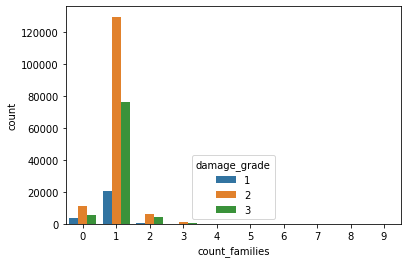

In [576]:
sns.countplot(df1['count_families'],hue=df1['damage_grade'])

- Most Damage occured to families with count 1

In [577]:
cat_var.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


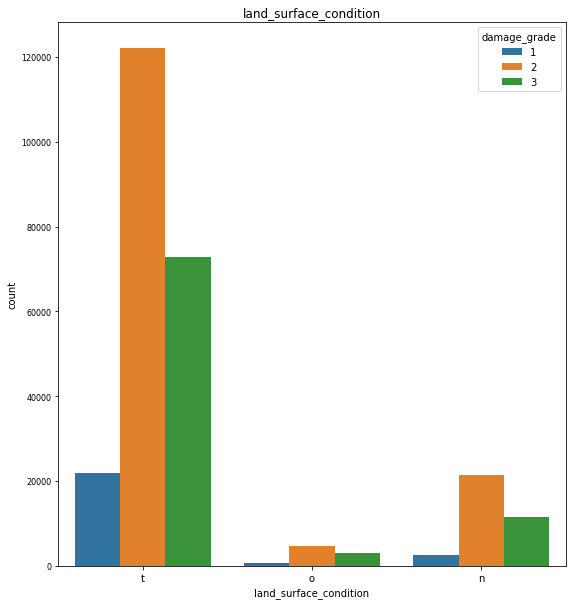

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


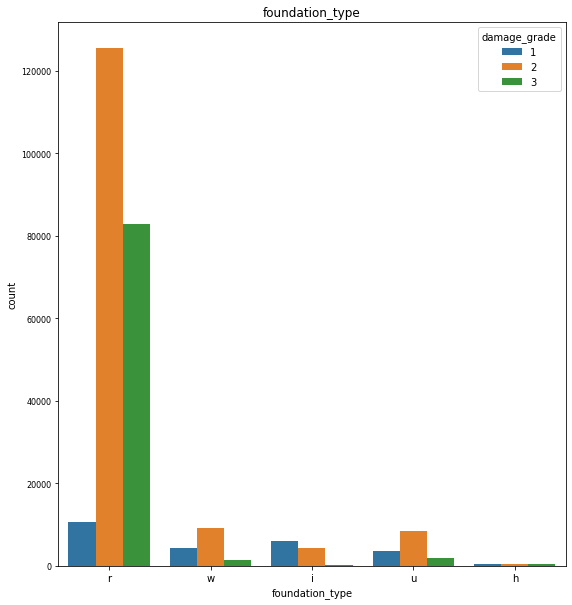

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


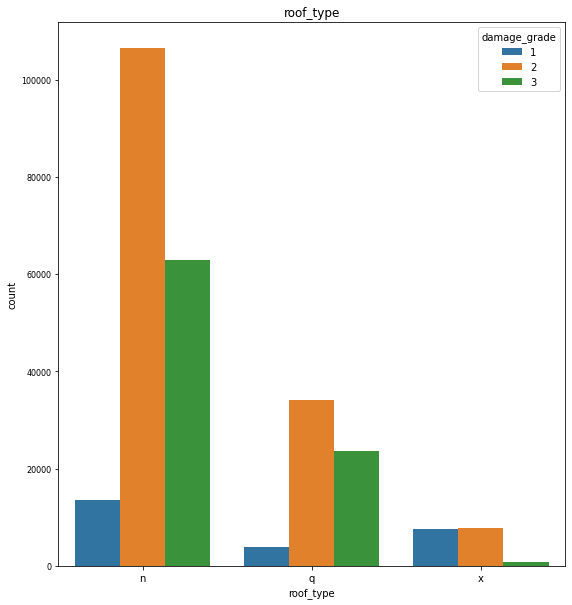

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


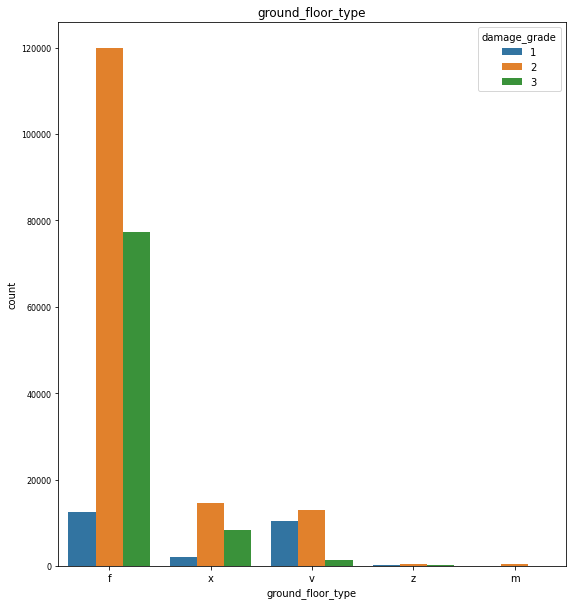

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


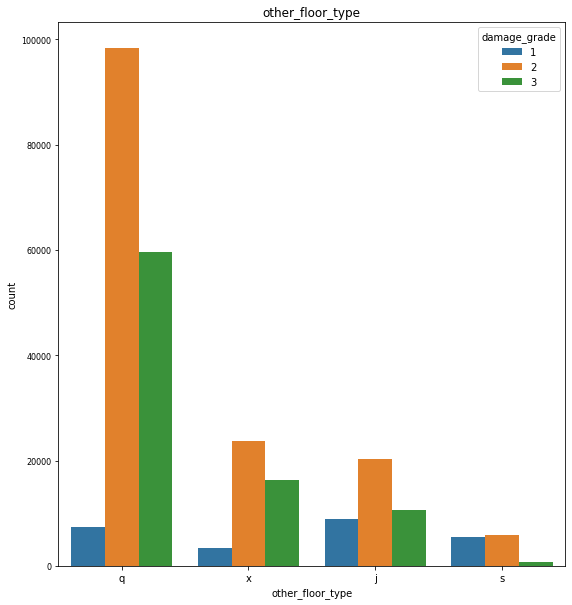

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


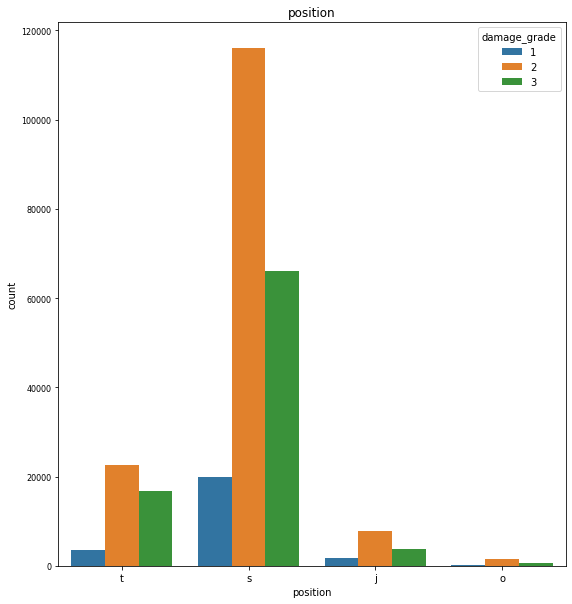

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


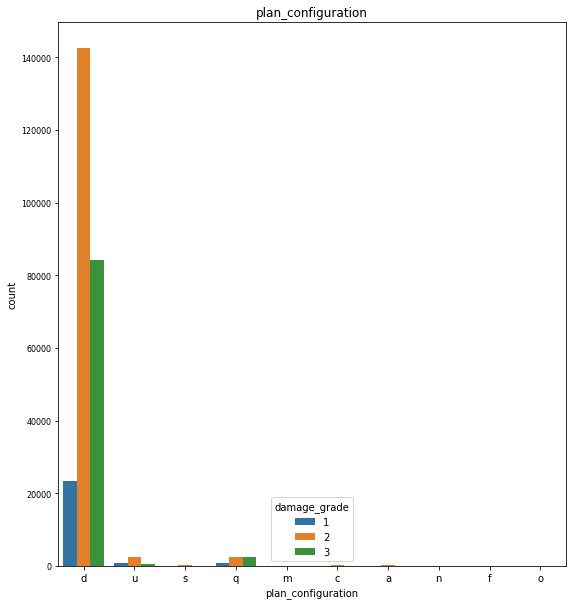

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


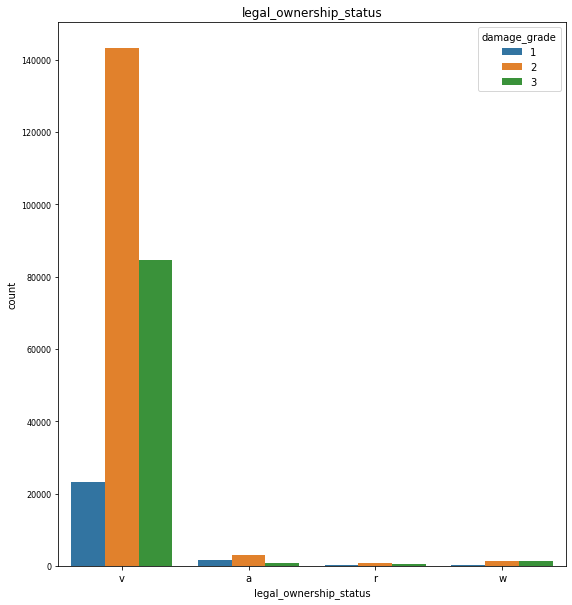

In [578]:
for i in cat_var:
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    ax = sns.countplot(cat_var[i],hue=df1["damage_grade"])
    plt.yticks(fontsize=8)
    #plt.xticks(rotation=90)
    plt.title(i)
    plt.show()

In [579]:
cat_var.shape

(260601, 8)

In [580]:
for i in cat_var:
  print(i)
  print(df1[i].unique())  
  print("==========")

land_surface_condition
['t' 'o' 'n']
foundation_type
['r' 'w' 'i' 'u' 'h']
roof_type
['n' 'q' 'x']
ground_floor_type
['f' 'x' 'v' 'z' 'm']
other_floor_type
['q' 'x' 'j' 's']
position
['t' 's' 'j' 'o']
plan_configuration
['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
legal_ownership_status
['v' 'a' 'r' 'w']


## **Train Test Split**

In [581]:
from sklearn.model_selection import train_test_split

In [582]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [583]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=127)

## **Column Transformations** 

In [584]:
# age --> right skewed --> yeo johnson
# area_percentage ---> LOG

- Log transformation for area_percentage as per analysis

In [585]:
X_train['area_percentage'] = np.log(X_train['area_percentage'])
X_test['area_percentage'] = np.log(X_test['area_percentage'])

In [586]:
X_train['area_percentage'].skew()

0.16179366210249077

- Yeo Johnson for age column as 0 values are present

In [587]:
from sklearn.preprocessing import PowerTransformer

In [588]:
pt = PowerTransformer(method='yeo-johnson')

In [589]:
X_train_age = pt.fit_transform(X_train[['age']])
X_test_age = pt.transform(X_test[['age']])

In [590]:
X_train_age

array([[-0.83037059],
       [-0.33147169],
       [ 0.45297368],
       ...,
       [ 0.7751387 ],
       [ 0.45297368],
       [-2.08101072]])

In [591]:
X_train['age_trans'] = X_train_age
X_test['age_trans'] = X_test_age

In [592]:
X_train.drop(columns=['age'],inplace=True)
X_test.drop(columns=['age'],inplace=True)

## **Handling outliers**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


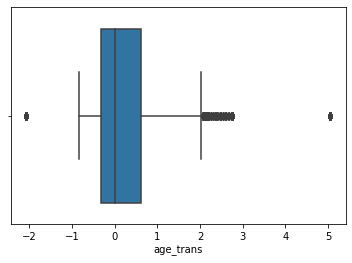

In [593]:
sns.boxplot(X_train['age_trans'])

In [594]:
X_train['age_trans'].skew()

0.1133986741997444

In [595]:
Q1 = X_train['age_trans'].quantile(0.25)
Q3 = X_train['age_trans'].quantile(0.75)

IQR = Q3-Q1

up_limit = Q3 + 1.5*IQR
low_limit = Q1 - 1.5*IQR

#### Capping the outliers

In [596]:
X_train['age_trans'] = np.where(X_train['age_trans']>up_limit,up_limit,np.where(X_train['age_trans']<low_limit,low_limit,X_train['age_trans']))
X_test['age_trans'] = np.where(X_test['age_trans']>up_limit,up_limit,np.where(X_test['age_trans']<low_limit,low_limit,X_test['age_trans']))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


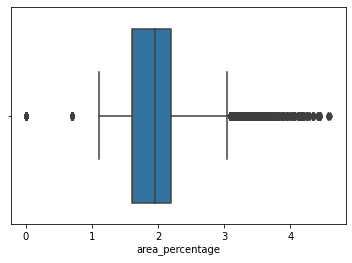

In [597]:
sns.boxplot(X_train['area_percentage'])

In [598]:
Q1 = X_train['area_percentage'].quantile(0.25)
Q3 = X_train['area_percentage'].quantile(0.75)

IQR = Q3-Q1

up_limit = Q3 + 1.5*IQR
low_limit = Q1 - 1.5*IQR

In [599]:
X_train['area_percentage'] = np.where(X_train['area_percentage']>up_limit,up_limit,np.where(X_train['area_percentage']<low_limit,low_limit,X_train['area_percentage']))
X_test['area_percentage'] = np.where(X_test['area_percentage']>up_limit,up_limit,np.where(X_test['area_percentage']<low_limit,low_limit,X_test['area_percentage']))

### **Encoding the Categorical Data**

In [600]:
from sklearn.preprocessing import OneHotEncoder

In [601]:
ohe = OneHotEncoder(drop='first',sparse=False)

In [602]:
cat_var.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [603]:
X_train_ohe = ohe.fit_transform(X_train[['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']])
X_test_ohe = ohe.fit_transform(X_test[['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']])

In [604]:
X_train_ohe

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [605]:
X_train.drop(columns=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],inplace=True)

X_test.drop(columns=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],inplace=True)

In [606]:
X_train_oh = pd.DataFrame(X_train_ohe)
X_test_oh = pd.DataFrame(X_test_ohe)

In [607]:
X_train_oh

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208475,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
208476,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
208477,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
208478,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [608]:
 X_train = X_train.reset_index()
 X_test = X_test.reset_index()

In [609]:
X_train1 = X_train.join(X_train_oh)
X_test1 = X_test.join(X_test_oh)

In [610]:
X_train1

,index,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,20,21,22,23,24,25,26,27,28,29
0,224706,959474,19,1193,4957,2,2.944439,6,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,153468,291082,11,415,9346,2,2.079442,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7449,948278,27,181,4369,2,2.302585,4,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,230394,789839,26,621,10264,1,1.945910,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,145203,951151,21,345,2860,3,1.609438,7,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208475,224292,410850,16,959,5223,2,1.945910,4,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
208476,214108,37321,20,1161,12440,2,1.945910,6,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
208477,197474,1044161,6,376,11743,2,2.397895,5,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
208478,90172,342309,8,558,7882,2,1.609438,5,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [611]:
X_train1.isna().sum()

index                                     0
building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
area_percentage                           0
height_percentage                         0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_timber                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered          0
has_superstructure_other                  0
count_families                            0
has_secondary_use_agriculture             0
has_secondary_use_hotel                   0
has_secondary_use_rental                  0
has_secondary_use_institution             0
has_secondary_use_school        

In [612]:
X_test1.isna().sum()

index                                     0
building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
area_percentage                           0
height_percentage                         0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_timber                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered          0
has_superstructure_other                  0
count_families                            0
has_secondary_use_agriculture             0
has_secondary_use_hotel                   0
has_secondary_use_rental                  0
has_secondary_use_institution             0
has_secondary_use_school        

In [613]:
X_train1.shape

(208480, 59)

In [614]:
X_train1.drop(columns=['index','building_id'],inplace=True)
X_test1.drop(columns=['index','building_id'],inplace=True)

In [615]:
X_train1.shape

(208480, 57)

In [616]:
X_test1.shape

(52121, 57)

### Dropping height_percentage column as discussed earlier.

In [617]:
X_train1.drop(columns=['height_percentage'],inplace=True)
X_test1.drop(columns=['height_percentage'],inplace=True)

## **Scaling**

In [618]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [619]:
X_train_ss = ss.fit_transform(X_train1[['geo_level_1_id','geo_level_2_id','geo_level_3_id','area_percentage']])
X_test_ss = ss.transform(X_test1[['geo_level_1_id','geo_level_2_id','geo_level_3_id','area_percentage']])

In [620]:
X_train1.drop(columns=['geo_level_1_id','geo_level_2_id','geo_level_3_id','area_percentage'],inplace=True)
X_test1.drop(columns=['geo_level_1_id','geo_level_2_id','geo_level_3_id','area_percentage'],inplace=True)

In [621]:
X_train_ss = pd.DataFrame(X_train_ss,columns=['geo_level_1_id','geo_level_2_id','geo_level_3_id','area_percentage'])
X_test_ss = pd.DataFrame(X_test_ss,columns=['geo_level_1_id','geo_level_2_id','geo_level_3_id','area_percentage'])

In [622]:
X_train_ss

,geo_level_1_id,geo_level_2_id,geo_level_3_id,area_percentage
0,0.635646,1.189991,-0.356371,2.174052
1,-0.360132,-0.694386,0.848314,0.248943
2,1.631424,-1.261152,-0.517764,0.745564
3,1.506952,-0.195438,1.100285,-0.048240
4,0.884591,-0.863932,-0.931952,-0.797081
...,...,...,...,...
208475,0.262229,0.623224,-0.283360,-0.048240
208476,0.760118,1.112484,1.697550,-0.048240
208477,-0.982493,-0.788847,1.506239,0.957683
208478,-0.733549,-0.348029,0.446478,-0.797081


In [623]:
# X_train1 = X_train1.reset_index()
# X_test1 = X_test1.reset_index()

In [624]:
X_train1

,count_floors_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_timber,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,...,20,21,22,23,24,25,26,27,28,29
0,2,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,1,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,1,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208475,2,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
208476,2,0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
208477,2,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
208478,2,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [625]:
X_train1 = X_train1.join(X_train_ss)
X_test1 = X_test1.join(X_train_ss)

In [626]:
X_train1.head()

,count_floors_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_timber,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,...,24,25,26,27,28,29,geo_level_1_id,geo_level_2_id,geo_level_3_id,area_percentage
0,2,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.635646,1.189991,-0.356371,2.174052
1,2,0,1,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.360132,-0.694386,0.848314,0.248943
2,2,1,0,0,0,1,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.631424,-1.261152,-0.517764,0.745564
3,1,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.506952,-0.195438,1.100285,-0.048240
4,3,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.884591,-0.863932,-0.931952,-0.797081


In [627]:
X_train1.isna().sum()

count_floors_pre_eq                       0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_timber                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered          0
has_superstructure_other                  0
count_families                            0
has_secondary_use_agriculture             0
has_secondary_use_hotel                   0
has_secondary_use_rental                  0
has_secondary_use_institution             0
has_secondary_use_school                  0
has_secondary_use_industry                0
has_secondary_use_health_post             0
has_secondary_use_gov_office              0
has_secondary_use_use_police              0
has_secondary_use_other                   0
age_trans                                 0
0                               

## **PCA to reduce Number of Columns**

In [628]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [629]:
X_train_trf = pca.fit_transform(X_train1)
X_test_trf = pca.transform(X_test1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [630]:
pca.explained_variance_.shape

(56,)

In [631]:
pca.components_.shape

(56, 56)

In [632]:
np.cumsum(pca.explained_variance_ratio_) # We need 90% of variance covered(Thumb rule)

array([0.15054051, 0.28050205, 0.40617811, 0.52561102, 0.63382831,
       0.69067548, 0.7375995 , 0.77038457, 0.79867989, 0.82487827,
       0.84650747, 0.86748722, 0.88560344, 0.90132029, 0.91250096,
       0.92291385, 0.93038514, 0.9372979 , 0.94406628, 0.95048784,
       0.95528567, 0.95997529, 0.96414268, 0.96813777, 0.9718724 ,
       0.97533602, 0.97843658, 0.98128326, 0.98390546, 0.98603976,
       0.98810595, 0.99002639, 0.9918456 , 0.9933972 , 0.99436424,
       0.99531178, 0.99620157, 0.99708169, 0.9977108 , 0.99817574,
       0.99863068, 0.99893111, 0.99916671, 0.99933113, 0.99948941,
       0.99962355, 0.999743  , 0.99983118, 0.99987679, 0.99990838,
       0.99992949, 0.99994817, 0.99996626, 0.99998024, 0.9999911 ,
       1.        ])

In [633]:
a = np.cumsum(pca.explained_variance_ratio_)

In [634]:
#Index numbers of variance ratio >0.90 | greater than 90%
np.where(a>0.90)[0]

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55])

In [635]:
#At 13 components variance is more than 90%
# We will take 20 as variance is 97% which is enough
pca = PCA(n_components=20)

X_train_trf = pca.fit_transform(X_train1)
X_test_trf = pca.transform(X_test1)
    


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### **Modelling**

In [636]:
from sklearn.ensemble import RandomForestClassifier

In [637]:
rf=RandomForestClassifier(n_estimators=10)

In [ ]:
y_train = y_train.reset_index()

In [640]:
rf.fit(X_train_trf,y_train)

RandomForestClassifier(n_estimators=10)

In [642]:
y_pred = rf.predict(X_test_trf)

In [641]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [643]:
confusion_matrix(y_test,y_pred)

array([[ 1503,  3206,   484],
       [ 1370, 21722,  6593],
       [  225, 11925,  5093]])

In [644]:
accuracy_score(y_test,y_pred)

0.5433126762725197